In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [4]:
iris = datasets.load_iris(as_frame=True).frame

In [7]:
iris = pd.read_csv("iris.csv")

<Axes: xlabel='variety', ylabel='count'>

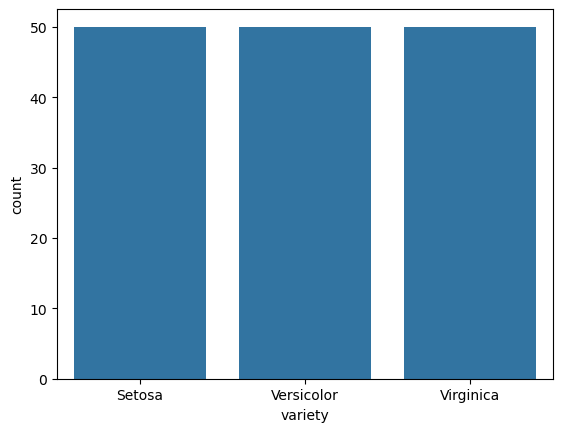

In [9]:
import seaborn as sns
counts = iris["variety"].value_counts()
sns.barplot(data = counts )

In [9]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
iris[iris.duplicated(keep= False)]

,sepal.length,sepal.width,petal.length,petal.width,variety
101,5.8,2.7,5.1,1.9,Virginica
142,5.8,2.7,5.1,1.9,Virginica


In [21]:
labelencoder=  LabelEncoder()
iris.iloc[:, -1] = labelencoder.fit_transform(iris.iloc[:,-1])
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Observation
- The target column('variety') is still object type.it needs to be converted to numeric(int)

In [32]:
iris['variety'] = pd.to_numeric(labelencoder.fit_transform(iris['variety']))
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


In [34]:
iris.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [17]:
X=iris.iloc[:,0:4]
Y=iris['variety']

In [19]:
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3)
x_train

,sepal.length,sepal.width,petal.length,petal.width
95,5.7,3.0,4.2,1.2
114,5.8,2.8,5.1,2.4
47,4.6,3.2,1.4,0.2
116,6.5,3.0,5.5,1.8
64,5.6,2.9,3.6,1.3
...,...,...,...,...
111,6.4,2.7,5.3,1.9
10,5.4,3.7,1.5,0.2
105,7.6,3.0,6.6,2.1
26,5.0,3.4,1.6,0.4


In [21]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = None)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

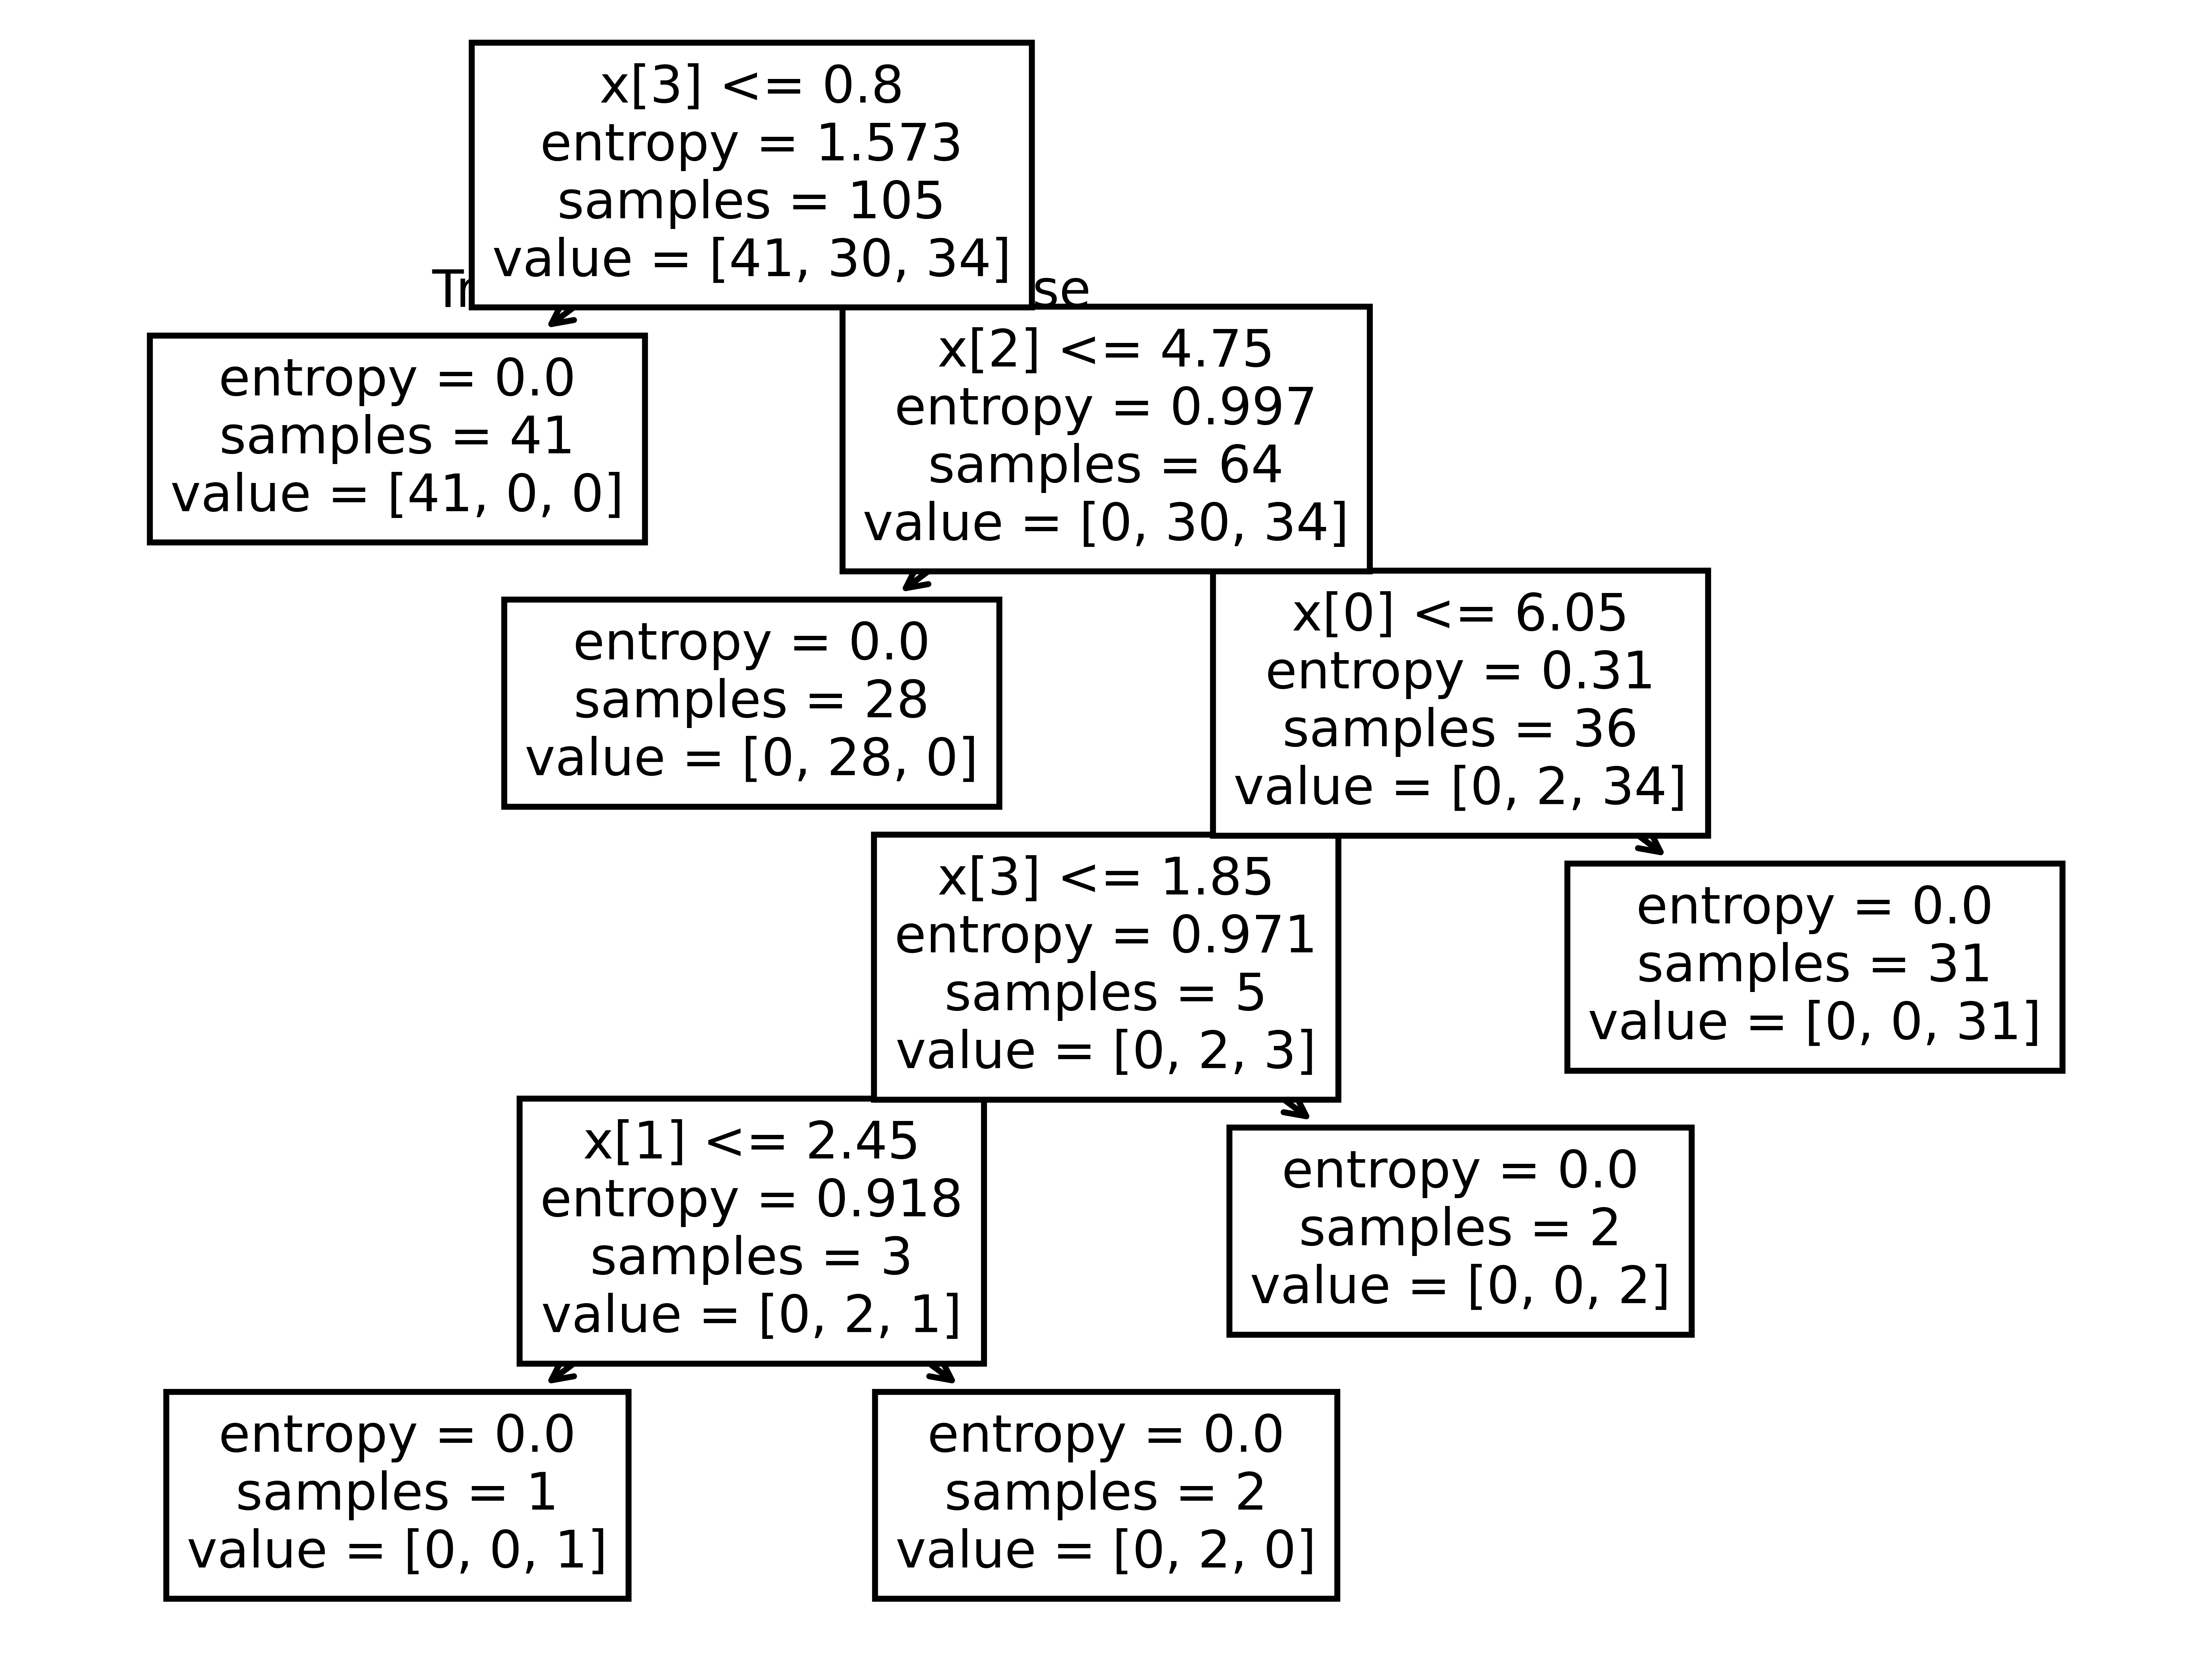

In [23]:
plt.figure(dpi=1200)
tree.plot_tree(model);

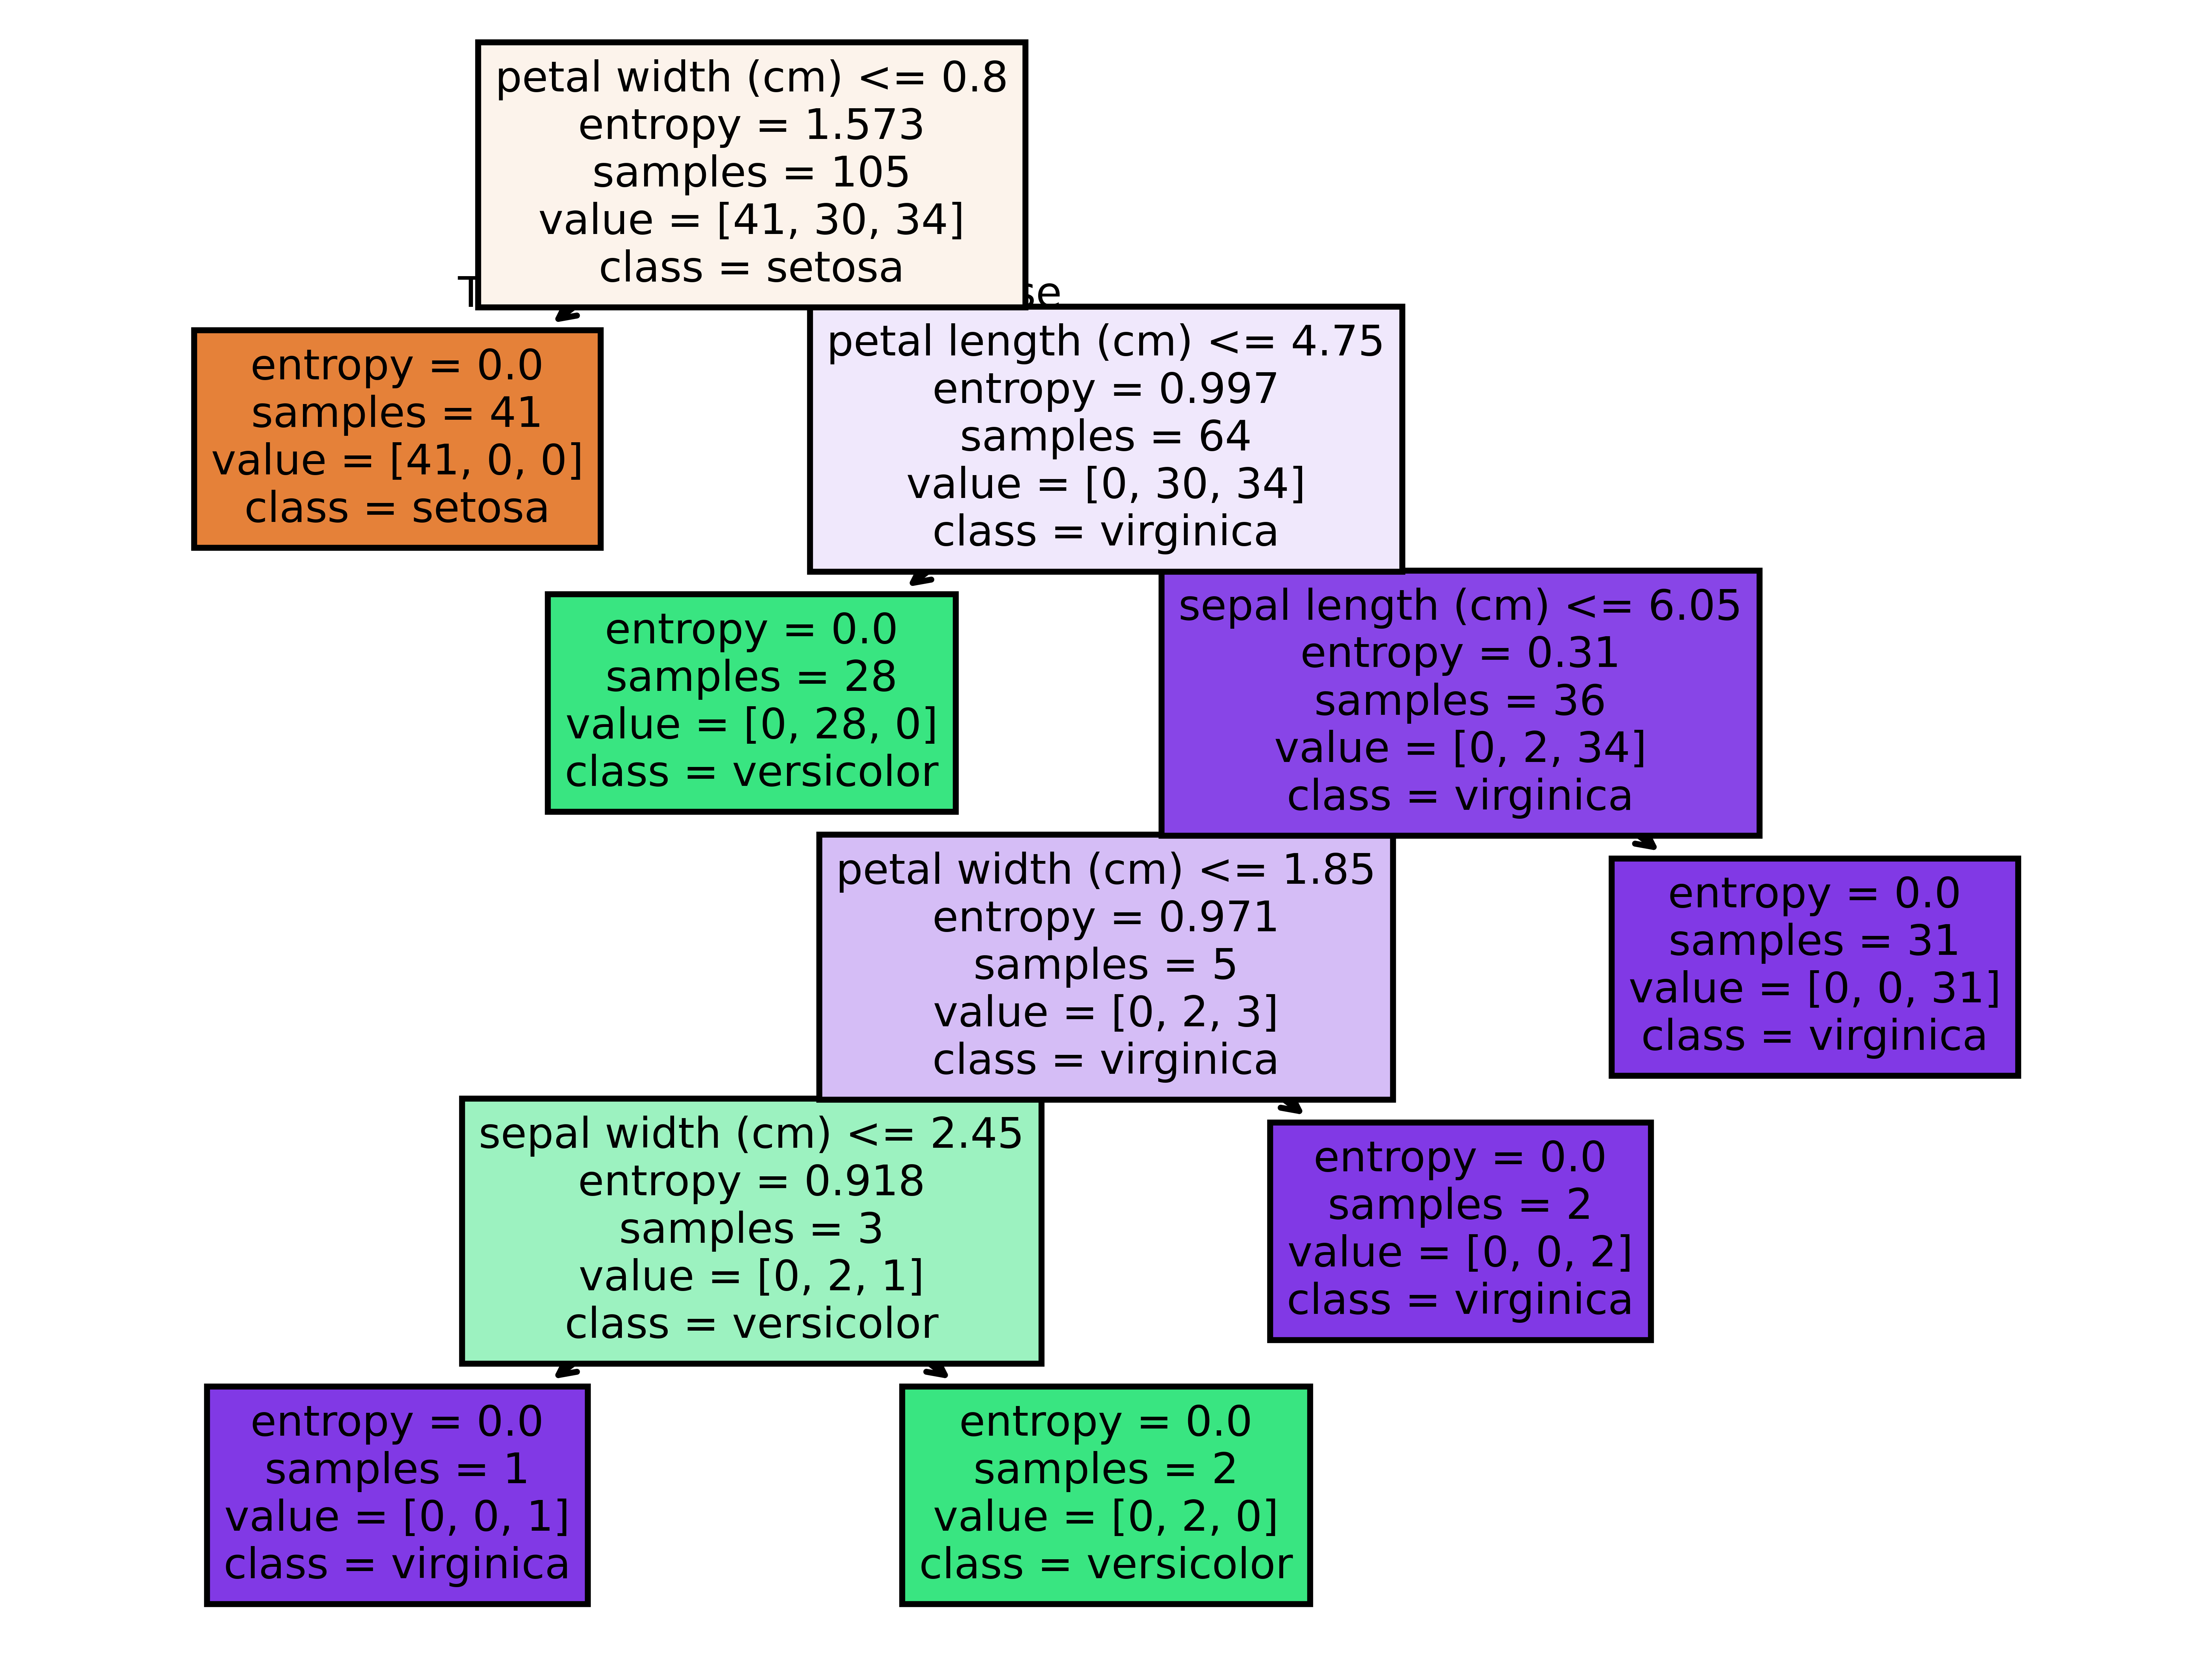

In [24]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']
plt.figure(dpi=1200)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True);

In [27]:
preds = model.predict(x_test)
preds

array(['Virginica', 'Virginica', 'Setosa', 'Versicolor', 'Versicolor',
       'Setosa', 'Setosa', 'Versicolor', 'Setosa', 'Virginica',
       'Versicolor', 'Versicolor', 'Versicolor', 'Virginica',
       'Versicolor', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Virginica',
       'Versicolor', 'Virginica', 'Virginica', 'Virginica', 'Virginica',
       'Setosa', 'Versicolor', 'Versicolor', 'Virginica', 'Virginica',
       'Virginica', 'Versicolor', 'Virginica', 'Versicolor', 'Setosa',
       'Versicolor', 'Versicolor', 'Virginica', 'Virginica', 'Setosa',
       'Versicolor'], dtype=object)

In [29]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         9
  Versicolor       0.84      0.80      0.82        20
   Virginica       0.76      0.81      0.79        16

    accuracy                           0.84        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.85      0.84      0.84        45

